# Module 3: Functional Programming III
Course: Advanced Programming for CSAI (Spring 2025)

Topics covered in this module:
- Iterables, Iterators and Generators. 
- Lazy Computation. 
- Real-world examples of Functional Programming.

You are advised to work on this notebook after, or in parallel to, consulting other materials of the module, such as the slide deck and book chapters. The notebook contains examples and exercises that should help you understand and apply the concepts introduced in the rest of materials. You may also use the official Python docs: https://docs.python.org/3/.

Do not hesitate to be creative when trying out the examples: you can play with the code. You can try variants of the examples and exercises, print values of the variables to understand what is going on at every step, and come up with different solutions to the same exercise and think about relative advantages of each one.

The notebook also contains formative assignments. These are indicated as FA-n, where n is a number id. As explained on the course guide, you have to submit these. Please submit your best effort (*i.e.*, FA-n questions with no answer will be considered incomplete), and **if your solution does not work or you think it is inadequate, add a comment explaining why you could not proceed further**.

To submit the formative assignments, we ask you to upload the filled-in notebook. The notebook you upload should contain *at least* the formative assigments. It's not a problem if you upload the notebook with additional code, like the variants and tests mentioned above. However, to grade your assignments, we will only look at the answers to the requested exercises (those indicated with FA-n), so **make sure you store your answers in the corresponding variables and/or to name your functions as indicated**.

Optional exercises are, as the name indicates, not mandatory for the formative assignments. These are exercises that suggest you to create an alternative approach, or which propose a longer problem that allows for the integration of earlier concepts in one solution; in general, they present scenarios where you can be more creative. To make the most of the course, it is best to try them out and share your solutions on the Discussion Board, so that your peers can comment on them. You are also encouraged to comment on the exercises of your fellow students. This will help you sharpen your evaluation skills, which is a great asset in programming, as in turn this will help you devise more robust, efficient and maintainable solutions. 


### /!\ Before submitting your notebook

Please check it can be ran without errors! You can check this by pressing kernel --> restart and run all before submitting. If it does not run without errors, it is your **responsibility** to fix the problem either by resolving the bug in your code or by commenting it out along with a comment.

---

## Iterables, Iterators and Generators

As you know from the Knowledge Clips, iterable objects (such as, for example, lists) are containers of other objects (such as, for example, integers). Iterables always have an __iter__ method, which returns an iterator for the iterable.

In [38]:
# Lists are iterable objects:
myList = ['blue', 'red', 'yellow']

# We can use for..in.. expressions to iterate, or individually access, each contained objects in the list:
for color in myList:
    print(color)

# Behind the curtains, for... in is calling iter(myList). 
# iter(myList) will call myList.__iter__()

# What should these calls return? (uncomment to find the answer)
print(iter(myList))
print(myList.__iter__())


#Notes:
print(iter(myList).__next__()) # blue
print(iter(myList).__next__()) # blue
print(iter(myList).__next__()) # blue
# print(myList.__iter__().__next__()) # blue
# print(myList.__iter__().__next__()) # blue
# print(myList.__iter__().__next__()) # blue

x = myList.__iter__() #one way
# print(next(x))  # blue
# print(next(x))  # red
# print(next(x))  # yellow

#x = iter(myList) #2nd way
# print(x.__next__())  # blue
# print(x.__next__())  # red
# print(x.__next__())  #  yellow 

#so iter(myList).__next__() == myList.__iter__().__next__()

#the only difference is: 
#iter(x) checks if object x has an __iter__() method
#__iter__() returns an iterator for the iterable

blue
red
yellow
blue
blue
blue


In [39]:
#Notes:
nums = [1, 2, 3]
iterator = map(lambda x: x * 2, nums) 
print(iterator)
# print(iterator[0]) # its not an iterable so we cant call it like iterator[0]
# print(next(iterator))  # 2
# print(next(iterator)) 

In [1]:
#Notes:
nums = ["M", "Ö", "R"] # iterable
en = enumerate(nums)   # iterator
print(en)  # <enumerate object at 0x000002CE2FD48BC0>
print(next(en)) # index and the actual value
print(next(en))
print(next(en))

(0, 'M')
(1, 'Ö')
(2, 'R')


In [41]:
#Notes:
nums = [1, 2, 3,4,5,6]
fil = filter(lambda x:x%2 ==0, nums)  # iterator
# print(fil) # <filter object at 0x000002CE2FF85B50>
print(next(fil))
print(next(fil))
print(next(fil))

2
4
6


In [42]:
#Notes:
name = ['a','b','ç'] 
marks = [45,89,23]
zi = zip(name,marks) # iterator
# print(zi) # <zip object at 0x000002CE2FD1C740>
print(next(zi))
print(next(zi))
print(next(zi))

('a', 45)
('b', 89)
('ç', 23)


In [43]:
#Notes:
x =  range(6,10) # iterable
print(x)
# c = [6,7,8,9] # iterable (list)
# print(c[0])
# print(c[1])

# print(x[0])
# print(x[1])

range(6, 10)


In [44]:
#Notes:
# if there is iterator i have to call it with next() but
# when there is iterable i have to call it with index []

Let's see other iterable datatypes:

In [45]:
# Dictionaries are iterable:
myDict = {'blue':'#000099', 'red':'#ff0000', 'yellow':'#ffff00'}

for color in myDict: # We access only the labels when iterating like this
    print(color)
print('\n')          # newline
    
for label, value in myDict.items(): # We need to call the method items() to iterate over keys and values
    print("key:", label, ", value:", value)
print('\n')          # newline



# Strings are also iterable:
myString = 'En un lugar de la Mancha...'

for letter in myString:
    print(letter, end=' ')    # Print space instead of newline at the end 
print('\n')          # newline


# And so are sets:
mySet = set((5,4,3,2,1))

# Note that items are not accessed necessarily in insertion order!:
for item in mySet:
    print(item, end=', ') 
print('\n')          # newline


blue
red
yellow


key: blue , value: #000099
key: red , value: #ff0000
key: yellow , value: #ffff00


E n   u n   l u g a r   d e   l a   M a n c h a . . . 

1, 2, 3, 4, 5, 



Let's check which of these types have an `__iter__` method:

In [46]:
# All iterables have an __iter__() method:
# We can check the methods of an object with dir()
# Can you predict which of these will be True?

print("Integer:", "__iter__"               in dir(1)) #int is not iterable nor iterator
print("List:", "__iter__"                  in dir(myList))
print("Dict:", "__iter__"                  in dir(myDict))
print("String:", "__iter__"                in dir(myString))
print("1-character string:", "__iter__"    in dir('a'))
print("Tuple:", "__iter__"                 in dir((3,2,1)))
print("List Comprehension:", "__iter__"    in dir([x+1 for x in [1,2,3]]))
print("Generator Expression:", "__iter__"  in dir((x+1 for x in [1,2,3])))


# Let's also check some functions:
print("Lambda function:", "__iter__"  in dir(lambda x:x)) #lambda is not iterable nor iterator

def times5(n):
    return n * 5

print("Function with return:", "__iter__"  in  dir(times5))


def times5_gen():
    start = 1
    yield start * 5 #yield is like iterator but without being in a loop - next() can be used once
    start += 1
    

print("Function with yield:", "__iter__"  in  dir(times5_gen())) 


Integer: False
List: True
Dict: True
String: True
1-character string: True
Tuple: True
List Comprehension: True
Generator Expression: True
Lambda function: False
Function with return: False
Function with yield: True


In [48]:
def times5_gen():
    start = 1
    yield start * 5 # we dont have loop, then we can call next once only
    start += 1
    
    
x =  times5_gen()
# print(x[0]) # error! not an iterable
print(next(x)) # 5 --> iterator
#print(next(x)) # error! because yield is called one time  but if yield is inside  loop then we can call next() so many times

5


In [49]:
def times5_gen():
    start = 1
    while start < 5:
        yield start * 5
        start += 1
    
    
x =  times5_gen()
print(next(x)) # 5 --> iterator
print(next(x)) # 10
print(next(x)) # 15
print(next(x)) # 25

5
10
15
20


Recall that iterables are collections of items, while iterators are not collections: they are objects that store a state (normally, an index). When looping over an iterable, the iterator of that iterable will tell us which item of the collection is the next to be read.

For example, imagine you have a list with 10 strings. Your list is an iterable, and therefore it has an `__iter__` method. We can print the contents of the list without using the `__iter__ `method; however, if we want to loop over the list (for example with a **for** loop), then Python will implicitly call the `__iter__` method to obtain an interator for the list. The iterator will keep track of which item should be read next by the **for** loop.  Therefore, the iterator will have a state, and a `__next__`method that will inform the **for** loop of which item in the list should be read in the current iteration.



### FA-1:



Which of the types above should also have a ``__ next __`` method? Why?

You are welcome to check your answer empirically (i.e. adapting the code above), but you are not required to do so. 

In [50]:
## Add your answer here: ##############################

fa1_answer = "All iterators have next() and they are enumerate, map, filter, zip. We can make the iterable an interator with the function iter() as well. The reson why they have next is because they are iterators because next() function cannot be applied on iterables." 

#######################################################

#### FA-2:

Now that you know which objects have a `__next__` method, 
create a small function that obtains an iterator from myList (i.e., iter(myList)) 
and manually calls next(...) three times, storing the items in a list named `fa2_result` and print `fa2_result` at the end.



In [51]:
## Your solution to FA-2 goes here:

fa2_result = []
myList=['blue','red','yellow']
make_iterator = iter(myList) 
fa2_result.append(next(make_iterator))
fa2_result.append(next(make_iterator))
fa2_result.append(next(make_iterator))


###########################

print(fa2_result)   # => ['blue', 'red', 'yellow']  (depending on the content of myList)
# - You should see the first three items of myList printed, e.g. ['blue', 'red', 'yellow'] 
# (if myList has at least 3 elements).


['blue', 'red', 'yellow']


As we know, `iter(x)` returns an iterator for an iterable `x`. We can check which additional methods the iterator of `x` provides (compared to `x`). We will do this for myList:

In [52]:
# First we obtain an iterator for myList:
myIterator = iter(myList) #it will return iterator
print(type(myIterator))
print(type(myList)) #this is iterable - only the list itself

# We can retrieve the methods of each of these objects
# (dir returns a list: we convert it to a set so that we can perform set operations later)
methods_myIterator = set(dir(myIterator))
methods_myList = set(dir(myList))
print('')

# Now we can see which methods are in myIterator but not in myList
print("Methods in the iterator which are not in the iterable:")
print(methods_myIterator - methods_myList) 
print('')
# Note that the iterator has __next__ !

# We can also check which methods are in myList but not myIterator:
print("Methods in the iterable which are not in the iterator:")
print(methods_myList - methods_myIterator)


<class 'list_iterator'>
<class 'list'>

Methods in the iterator which are not in the iterable:
{'__next__', '__setstate__', '__length_hint__'}

Methods in the iterable which are not in the iterator:
{'remove', 'pop', '__contains__', '__imul__', '__setitem__', '__len__', '__delitem__', 'insert', '__add__', '__rmul__', '__mul__', 'index', 'append', 'extend', '__getitem__', '__reversed__', 'reverse', 'clear', '__iadd__', 'copy', 'count', 'sort'}


Note that the iterator provides us with the __ next __  method, which was not available in the iterable!

Note also that the __ iter __ method is not listed above: this is a method that is common both to iterables and iterators (in the case of an iterator, __ iter __ returns self: this is just a language design feature that makes the implementation simpler behind the curtains).


### FA-3: 

If you look at the methods listed above, you can see that the the iterable has a method `__ len __` . This is the method called when we do len(myList) to obtain the number of elements in the list. Note that this method is not available in the iterator: you can further verify that len(myIterator) raises a TypeError.

Now look at the example below. The function **firstn** is a generator, as it uses **yield**. As you can see, the generator has an `__ iter __` method, and also a `__ next __` method: 

In [53]:
# This function is a generator:
def firstn(n):
    num = 0
    while num < n:
        yield num
        num += 1

g = firstn(4)
print("Generator object:", g)
print("iter in generator:", hasattr(g, '__iter__')) #we have this in the iterable
print("next in generator:", hasattr(g, '__next__')) #we have this in the iterator
print(hasattr(g, '__len__'))

Generator object: <generator object firstn at 0x0000014D24C9BF90>
iter in generator: True
next in generator: True
False


Given what you have seen above, and what you know of generators, try to deduce whether *g* should have a `__len__` method. (You can check your answer empirically using **hasattr**, but it would really help your study to try to deduce this beforehand: this would let you see if you understand what generators are). Provide an explanation of your answer:

In [54]:
## Add your answer here: ##############################

fa3_answer = "print(hasattr(g, '__len__')) it gives False because we can run generator forever as a end loop using while True. This is the reason why there is no specific length for generators."

#######################################################

#### FA-4:
Create a generator function `squares(n)` that yields the squares of 
numbers from 0 up to `n` (inclusive). 
Then obtain an instance `gen = squares(5)` 
and manually print `next(gen)` several times. 


In [55]:
## Your solution to FA-4 goes here:

def squares(n):
    num = 0
    while num <= n:
        yield num**2
        num += 1

###########################

gen = squares(5)
print(next(gen))  # => 0
print(next(gen))  # => 1
print(next(gen))  # => 4
# ......
# .....
# Printing next(gen) repeatedly should show 0, 1, 4, 9, 16, 25.
print(next(gen))
print(next(gen))
print(next(gen))

0
1
4
9
16
25


### FA-5: 

Imagine you are using a function from a third-party library that returns a generator. You want to write a program that produces a visualization of the elements of this generator, but you want to know beforehand how many elements you can obtain from the generator, as this will help you decide how to display this elements on the screen. How can you do this? (you do not need to submit any code, just reflect on the question).

In [56]:
## Add your answer here: ##############################

fa5_answer = """ Since generator does not have len func we cant calculate it from using len function.
So we can create a counter and using try except method, we can add +1 every time it is generating a number and when it gives the stop iteration error, it will go to except and break the loop. In the end we can print count and see how many items the generator generated. 
count=0
while True:
    try:
        next(gen)
        count+=1 
    except:
        break
"""

#######################################################

#### FA-6:

Consider a generator function `gen_random_floats(n)` that yields `n` random float values. 
 
 **Hint:** `random` package is alredy imported. You can use the `random.random()` function to generate random numbers.
 
1) Implement the `gen_random_floats(n)` generator 
2) Call `gen_random_floats(n)` with `n = 5` to create a generator and store it in the variable `rand_5_nums`.
3) In a for loop collect the results of the `rand_5_nums` and store them in the `fa6_list`.
4) Print the length of `fa6_list` to confirm it is `n`.


In [57]:
import random

## Your solution to FA-6 goes here:

def gen_random_floats(n):
    num = 0
    while num < n:
        yield round(random.random(),2)
        num += 1
    
n = 5
rand_5_nums=gen_random_floats(n) #creating the generator #n here must the same variable as the other n-s in the code
fa6_list=[]
#we cant use for loop because it is unknown how many items there are
while True:
    try:
        fa6_list.append(next(rand_5_nums))
    except:
        break
##############################

print(len(fa6_list)) # => 5
print(fa6_list)
# If n = 5, you should see 5 random floats in fa6_list, 
# e.g., [0.43, 0.89, 0.01, 0.47, 0.99], and len(fa6_list) = 5


5
[0.71, 0.82, 0.87, 0.95, 0.64]


#### FA-6-a:
 
What would happen if you directly cast `rand_5_nums` to a list by calling `list()`? 

Make a `fa6a_list` this time by using `list()` and then print the length of `fa6a_list` to confirm it is `n`. (Pay closer attention to naming the variables we are printing `fa6a_list` here and not `fa6_list`)

In [58]:
## Your solution to FA-6-a goes here:

#fa6a_list=list(rand_5_nums) #it will generate an empty list because in the above cell the five numbers are already generated thats why it is empty now: 0 []

fa6a_list=list(gen_random_floats(n)) #this is why we use directly the generator in order to access new five random numbers

#if I create variable rand_5_nums=gen_random_floats(n) and then use rand_5_nums below it will give fine as well
rand_5_nums=gen_random_floats(n)
fa6a_list=list(rand_5_nums)
###########################

print(len(fa6a_list)) # => 5
print(fa6a_list)
# If n = 5, you should see 5 random floats in fa6a_list, 
# e.g., [0.43, 0.89, 0.01, 0.47, 0.99], and len(fa6a_list) = 5

5
[0.46, 0.54, 0.81, 0.54, 0.2]


----
## Lazy evaluation


When working on the previous section, you should have noticed some differences in the behavior of generators, compared to other iterables such as lists and dictionaries. This has to do with the fact that generators are lazy. 

If you have not done so yet, this would be a good moment to watch the Knowledge Clip about Lazy Evaluation. 

To test your understanding of the concept of Lazy Evaluation, look at the following examples, and predict what the outcome should be with eager and with lazy evaluation. In particular, think which of these statements should print the word "right", in two theoretical cases: when using a programming language with eager evaluation, and when using a programming language with lazy evaluation. 

When you run the examples, note that Python uses lazy evaluation for Boolean expressions with **and** and **or**. 

In [59]:
True and (print("right") is None) #prints does not return anything so it is None

#right is printed because of print("right")
#True is printed because both sides here are True: True and (print("right") is None)

right


True

In [60]:
False and (print("right") is None) #this will never check the 2nd part because the 1st is False

print(print("right")) # we see printed right None because of this line only; and we have 2 times print to see if the print() itself prints something

right
None


In [61]:
True or (print("right") is None) #this will not check the 2nd part because the 1st is True

True

In [62]:
False or (print("right") is None) #it will check the 2nd part because it has hope that the 2nd part might be True

right


True

In [67]:
#Notes:

#Lazy
# F and sth -> doesnot check the 2nd
# T and sth -> check the 2nd

# F or sth -> check the 2nd
# T or sth -> doesnot check the 2nd

#eager
#it will check all statements no rules

As you know, generators are also lazy in Python: they don't create all the results immediately, but delay their evaluation until the moment they are needed. This applies both to generator expressions and generator functions with *yield*. 


In [68]:
# The numbers generator defined below has an infinite loop (while True)!
def numbers(): 
    i = 0
    while True:     
        yield i 
        i += 1
               
# However, we can call this function without running into an infinite loop!
# This is thanks to lazy evaluation: the numbers of this generator are only computed when needed.
g = numbers()

# We can get the next number as many times as we want 
print(next(g))
print(next(g))
print(next(g))

for _ in range(5):
    print(next(g))

print('')

# But don't do the following! (unless you add a break condition)
# for number in g:
#    print(number)
# Since there is no stopping condition, this loop would run infinitely 
# (and you'd have to stop it on time and possibly restart the kernel, and perhaps even your computer)

# The itertools module provides a generator with the same functionality as numbers:
import itertools 

g = itertools.count()
print(next(g))
print(next(g))
print(next(g))


0
1
2
3
4
5
6
7

0
1
2


Here is an example that uses the numbers generator. Note that it uses a break condition!

In [69]:
def sum_to(n):
    sum = 0
    for i in numbers():
        if i == n: 
            break
        sum += i
    return sum

print("Result: ", sum_to(5))
print("Result: ", sum_to(15))
print("Result: ", sum_to(30))


Result:  10
Result:  105
Result:  435


### FA-7

Generators and list comprehensions look very similar, but list comprehensions are eager while generators are lazy.      

Have a look at the following example. We have some *data* stored in a list, and a function that always accesses it in insertion order, up to a certain position (included), and returns the last accessed element.


In [70]:
data = [2,53, 1, 6674, 23, 16435, 95, 220, 32, 27, 3, 96, 261, 2856]

l = [x for x in data if x % 2 == 0]

g = (x for x in data if x % 2 == 0) #generator

print(l)
print(g)
                    #l  #2       True        from print(access_in_order(l, 2, True))
def access_in_order(it, until, verbose=False):
    for i, element in enumerate(it): #i is index and element isfrom [2, 6674, 220, 32, 96, 2856]
        if verbose:
            print("Accessing element ", i, ": ", element)
        if i >= until: #if index of element is >= until
            return element
    
    
print(access_in_order(l, 2, True)) #if i print two times this, it will give the same two times:
print(access_in_order(l, 2, True)) 
# Accessing element  0 :  2
# Accessing element  1 :  6674
# Accessing element  2 :  220
# 220
# Accessing element  0 :  2
# Accessing element  1 :  6674
# Accessing element  2 :  220
# 220

print(access_in_order(g, 2, True))   #in generator when it sees one thing once, it iwll not repeat it but continue from the next new elements
print(access_in_order(g, 2, True))   # Note that we get a different result now! 
                                     # since g is a generator, it keeps the state
# Accessing element  0 :  32
# Accessing element  1 :  96
# Accessing element  2 :  2856
# 2856
# Accessing element  0 :  2
# Accessing element  1 :  6674
# Accessing element  2 :  220
# 220

g = (x for x in data if x % 2 == 0)  # We need to create it again if we want to regenerate it
print(access_in_order(g, 2, True))


[2, 6674, 220, 32, 96, 2856]
<generator object <genexpr> at 0x0000014D24D246D0>
Accessing element  0 :  2
Accessing element  1 :  6674
Accessing element  2 :  220
220
Accessing element  0 :  2
Accessing element  1 :  6674
Accessing element  2 :  220
220
Accessing element  0 :  2
Accessing element  1 :  6674
Accessing element  2 :  220
220
Accessing element  0 :  32
Accessing element  1 :  96
Accessing element  2 :  2856
2856
Accessing element  0 :  2
Accessing element  1 :  6674
Accessing element  2 :  220
220


What are the relative advantages of using this function with `l` or `g`? Think what would happen in case of much larger data.

In [71]:
## Add your answer here: ##############################

fa7_answer = "With g we can generate all the numbers until the end of the list but we cannot access the same numbers twice; with g we cannot track the location of elements and we need to go over the whole list to reach the desired number. With l we can track the location of different numbers and give directly the diresired number without going over the whole list. G is slow and l is fast. In case of large data, using g is more memory efficient than a list because g does not store all the elements in the memory at once, it will generate the elements when we need them. So in large data we will prefer g."

#######################################################

#### FA-8:

Rewrite the function `access_in_order()` as a generator function called `yield_in_order`, 
which yields each element up to `until` index, instead of returning a single element.

Implementation steps:
1) `yield_in_order(it, until)` should yield each item from `it` until `i >= until`.
2)  Demonstrate by converting its output to a list or manually using `next()`.

**Hint:** If we do `list(yield_in_order(l, 2))` for `l=[2, 6674, 220, ...]`, it should produce the first 3 elements from `l` (indices 0,1,2).




In [72]:
## Your solution to FA-8 goes here:

l=[2, 6674, 220, 32, 96, 2856]
                #it is l and until is 2
def yield_in_order(it, until):
    for i, element in enumerate(it): #i is index and element isfrom [2, 6674, 220, 32, 96, 2856]
        yield element
        if i >= until: #if index of element is >= until
            return  #this means come out the func and dont return anything
        
mygen = yield_in_order(l,2)
print(next(mygen))
print(next(mygen))
print(next(mygen))    
###########################

result_list = list(yield_in_order(l, 2))
print(result_list)      # => [2, 6674, 220]  (according to the data we had defined)

2
6674
220
[2, 6674, 220]


#### FA-9:
Now lets use classes instead of functions. Create a class named `RangeIterator` that implements the iterator protocol to yield integers from 0 up to `n` (including 0). Remember that iterators need to have an `__iter__` and a `__next__` methods. 

1) Create a class named `RangeIterator` with an `__init__(self, n)`,  `__iter__(self)`, and a `__next__(self)` methods.
2) Since the class represents an iterator, `__iter__` should return itself.
3) The `__next__` method should return the next item in the sequence.
4) When `n` is reached, the `__next__` method should raise `StopIteration` to signal it is exhausted.

Demonstrate usage by looping over `RangeIterator(5)` and printing its items.


In [73]:
## Your solution to FA-9 goes here:
class RangeIterator:
    def __init__(self, n):
        self.n=n
        self.i=0 #equal to 0 means that I dont have to pass i in the init arguments
    def __iter__(self):
        return self
    
    def __next__(self):
        if self.i >= self.n:
            raise StopIteration
        v= self.i
        self.i+=1
        return v
       

###########################

for x in RangeIterator(5):
    print(x) # => 0, 1, 2, 3, 4


0
1
2
3
4


### FA-10

Now write a function `random_access` that only accesses an element in one given position in *data*, converts it to a string, and returns it. Would you prefer to use `l` or `g` in this case? Think about the efficiency of each option.

In [74]:
## Your solution to FA-10 goes here:
#I prefer l because g does not track elements locations but l does and we choose l because we can directly access the element's location because of the prestored memory.
data = [2,53, 1, 6674, 23, 16435, 95, 220, 32, 27, 3, 96, 261, 2856]
l = [x for x in data if x % 2 == 0]

def random_access(it,random_position): #it can be l or g
    for i,el in enumerate(it):
        if i==random_position:
            return str(el)


###########################

random_position = 2
print(random_access(l, random_position)) # =>220

g = (x for x in data if x % 2 == 0) # Re-generate the exhausted generator
print(random_access(g, random_position)) # =>220


220
220


#### FA-11:

In the current 'random_access' idea, suppose we want a variation that also 
returns the original index in *data*. 
Create a function `random_access_with_index(source, pos)` that returns (index, element). 
Show a short example of usage with `l` or `g`.


**Hint:**  If `l` has [2, 220, 32, 96, ...] for examle, calling `random_access_with_index(l, 2)` might return (2, 220).



In [75]:
## Your solution to FA-11 goes here:

data = [2,53, 1, 6674, 23, 16435, 95, 220, 32, 27, 3, 96, 261, 2856]
l = [x for x in data if x % 2 == 0]
g = (x for x in data if x % 2 == 0)
def random_access_with_index(source, pos): #it can be l or g
    for index,element in enumerate(source):
        if index==pos:
            return index,element
        
print(random_access_with_index(g, 2))

###########################

print(random_access_with_index(l, 2))# => (2, 220)


(2, 220)
(2, 220)


#### FA-12:
Use the `random_access` function to retrieve the last item in `l`, 
by calling `random_access(l, len(l)-1)`. 
Then re-generate `g` and do the same. Print both results.

Expected outcome:
- You should see the last even item in *data* for both `l` and `g`. 
- But remember that `g` can be exhausted, so re-generate it first if needed.

In [76]:
## Your solution to FA-12 goes here:

data = [2,53, 1, 6674, 23, 16435, 95, 220, 32, 27, 3, 96, 261, 2856]
l = [x for x in data if x % 2 == 0]

def random_access(it,random_position): #it can be l or g
    for i,el in enumerate(it):
        if i==random_position:
            return str(el)


###########################

random_position = 2
print(random_access(l, len(l)-1)) # =>2856

g = (x for x in data if x % 2 == 0) # Re-generate the exhausted generator
print(random_access(g, len(l)-1)) # =>2856 #len is a func only for l but we use it here because the length of l and g is the same


###########################


2856
2856


----
# Real-word example 1: Fibonacci numbers

First, familiarize yourself with these functions, which will be useful later.


In [77]:
import itertools

# Take    
def take(n, iterable):
    "Return first n items of an iterable as a list"
    
    return list(itertools.islice(iterable, n)) #"iterable" is infinite iterable starting from 20 and going infinite; n=5
                #  -> i need 5 numbers among 20 different nums; islice says how many n number i need from the iterable
    
# Example of use: take the first 5 elements of a generator
print(take(5, itertools.count(start=20))) #this will create infinite iterable that will continue starting from 20
           #n     # iterable    #count creates the ininite iterable
    #overall: I have iterable (long candy) and 5 is how many pieces I want cut and 20 is the number where I need to start
    #so I need to start from 20 and continue 21 22 23 24 
    #so take() will print the five different numbers
    
# Iterate; this is the same but different way to do generator; the 2nd option is with yield
def iterate(f, x):
    "..."                        #1st it will put 10 after it will put the returned answer from lambda
                                 #we pass x to the fx automatically and from fx we give back the answer to x 
                                 # if i dont use this itertools.repeat(x) in another func like lambda, it will return the num 10 infinite times
    return itertools.accumulate(itertools.repeat(x), lambda fx, _: f(fx)) #so the 1st num for x is 10 and every next is x+fx
                     #accumulate is a function that generates infinite numbers
    #if we have predefined list that accumulate will generate numbers until the end of the list and not infinite
             #f           #x
g = iterate(lambda x:x+2, 10)
  
print(g)

# Note: don't visualise the content of g with print(list(g))! 
# Can you anticipate what would happen if you did this?

print(next(g))
print(next(g))
print(next(g))

[20, 21, 22, 23, 24]
10
12
14



### FA-13

What does `iterate` do?

Hint: you can have a look at the `itertool` functions at the official docs: https://docs.python.org/3/library/itertools.html

In [78]:
## Add your answer here: ##############################

fa13_answer = "iterate takes a func and value as arguments. Iterate generate an infinite sequence of numbers that starts from 'value' and increate by +2 every next number. Intertools.repeat(x) does infinite sequnece of x, and lambda fx adds +2 to x and lambda function passes the x from itertools.repeat(x) and adds +2 and then returns back the new number. On every next loop it does the same thing with adding +2 every time. With iterate(lambda x:x+2, 10) we create a generator where the values of f and fx are passed so f is lambda x:x+2 and x is 10 so fx is every new number with extra +2."

#######################################################

#### FA-14:
We have the `iterate` function that creates an infinite sequence x, f(x), f(f(x)), ...
1) Define a simple function `add_one(x)` that returns `x + 1`.
2) Create an iterator `it = iterate(add_one, 0)`.
3) Print `next(it)` 5 times to see the sequence of integers growing from 0.

Expected outcome:
- Printing `next(it)` 5 times should yield 0, 1, 2, 3, 4 (or 1, 2, 3, 4, 5 depending on implementation).

In [79]:
## Your solution to FA-14 goes here:

add_one = lambda x: x+1

###########################

it = iterate(add_one, 0)
print(next(it))  # => 1
print(next(it))  # => 2
print(next(it))  # => 3
print(next(it))
print(next(it))
#...
# you can also change this print into a for loop


0
1
2
3
4


Now we can look at two implementations of Fibonacci numbers.

### FA-15:

Read the two implementation below. Before running them, can you predict which one will be faster? Was your intuition correct? Explain what makes one faster than the other.

In [80]:
# Implementation 1

def fib(n):
    if n == 0:
        return 1
    if n == 1:
        return 1
    return fib(n-1) + fib(n-2)

def fibs(n):
    return [fib(i) for i in range(n)]

%time fibs(30)

CPU times: total: 844 ms
Wall time: 842 ms


[1,
 1,
 2,
 3,
 5,
 8,
 13,
 21,
 34,
 55,
 89,
 144,
 233,
 377,
 610,
 987,
 1597,
 2584,
 4181,
 6765,
 10946,
 17711,
 28657,
 46368,
 75025,
 121393,
 196418,
 317811,
 514229,
 832040]

In [81]:
# Implementation 2

def next_fib(pair):
    x, y = pair
    return (y, x + y)

def fibs():
    return (y for x, y in iterate(next_fib, (0, 1)))

%time take(30, fibs())

CPU times: total: 0 ns
Wall time: 0 ns


[1,
 1,
 2,
 3,
 5,
 8,
 13,
 21,
 34,
 55,
 89,
 144,
 233,
 377,
 610,
 987,
 1597,
 2584,
 4181,
 6765,
 10946,
 17711,
 28657,
 46368,
 75025,
 121393,
 196418,
 317811,
 514229,
 832040]

In [82]:
## Add your answer here: ##############################

fa15_answer = "The second implementation is faster. Iterative approach is applied with time complexity O(n) which is linear - generating once the Fibonacci number. In the other hand, the 1st implementation uses recursion with big time complexity of  O(n**2) which is slower than the 2nd implementation."

#######################################################

----
## Real-world example 2: K-means Clustering

Now we will look at a fully-fledged real-world application of functional programming: the implementation of the K-means algorithm. We will see an object-oriented and a functional approach. Read the code, try to understand it and play around with it, if you wish. Most importantly: compare the presented approaches, and reflect on their differences.

Basic idea of K-means:
* we have some points
* we want to group them into *k*  clusters
* we want clusters to be "small"

Iterative approach:
* choose *k* means
* assign each point to cluster of "closest" mean
* compute new means
* repeat

In [83]:
# %pip install numpy matplotlib
# (uncomment the above^ line, the first time you run this code)

import numpy as np
import random
from functools import reduce
from functools import partial
from operator import add

import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import clear_output

First an object-oriented implementation: 

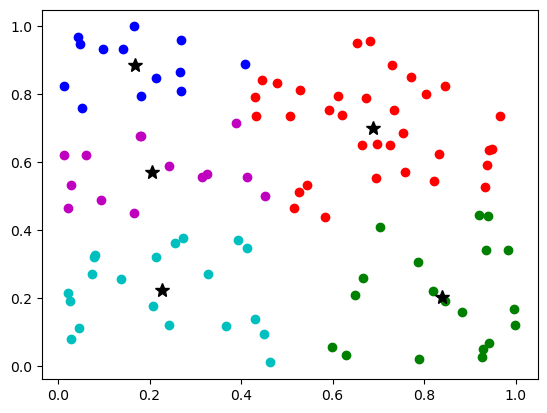

In [84]:
class KMeans:
    def __init__(self, k):
        self.k = k
        self.means = [None for _ in range(k)]
        
    def predict(self, point):
        """return index of closest mean"""
        d_min = float('inf')
        for j, m in enumerate(self.means):
            d = sum((m_i - p_i)**2 for m_i, p_i in zip(m, point))
            if d < d_min:
                prediction = j
                d_min = d            
        return prediction


    def fit(self, points, num_iters=10):
        """find the k means"""
        assignments = [None for _ in points]
        self.means = random.sample(list(points), self.k)
        for _ in range(num_iters):
            # assign each point to its closest mean
            for i, point in enumerate(points):
                assignments[i] = self.predict(point)
            # compute new means
            for j in range(self.k):
                cluster = [p for p, c in zip(points, assignments) if c == j]
                self.means[j] = list(map(lambda x: x / len(cluster), reduce(partial(map, add), cluster)))
            assignments = [self.predict(point) for point in points]
            self.plot_current(points, assignments)
                
    def plot_current(self, points, assignments):
        clear_output(wait=True)
        for j, color in zip(range(5), ['r', 'g', 'b', 'm', 'c']):
            cluster = [p for p, c in zip(points, assignments) if j == c]
            xs, ys = zip(*cluster)
            plt.scatter(xs, ys, color=color)
        # now plot the means and the clusters
        for x, y in self.means:
            plt.plot(x, y, marker='*', markersize=10, color='black')
        plt.show()        
        plt.pause(1)
            
# 100 random points, 5 clusters
k = 5
points = np.random.random((100,2))
model = KMeans(k)
model.fit(points)

Now the functional alternative:

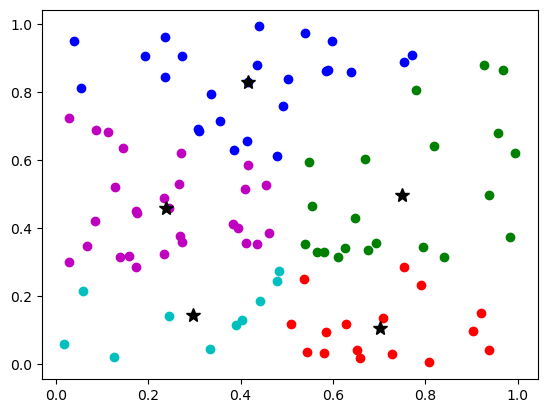

In [85]:
import numpy as np
import random

import matplotlib.pyplot as plt
%matplotlib inline

def k_means(points, k, num_iters=10):
    means = random.sample(list(points), k)
    for _ in range(num_iters):
        means = new_means(points, means)
        assignments = [closest_index(point, means) for point in points]
        plot_current(points, assignments, means)
    return means

def new_means(points, old_means):
    k = len(old_means)
    assignments = [closest_index(point, old_means) for point in points]
    clusters = [[point for point, c in zip(points, assignments) if c == j] for j in range(k)]
    return [cluster_mean(cluster) for cluster in clusters]

def closest_index(point, means):
    distances = [squared_distance(point, mean) for mean in means]
    return min(enumerate(distances), key=lambda pair: pair[1])[0]

def squared_distance(p, q):
    return sum((p_i - q_i)**2 for p_i, q_i in zip(p, q))

def cluster_mean(points):
    num_points = len(points)
    dim = len(points[0]) if points else 0
    
    sum_points = [sum(point[j] for point in points) for j in range(dim)]
    return [s / num_points for s in sum_points]

def plot_current(points, assignments, means):
    clear_output(wait=True)
    for j, color in zip(range(5), ['r', 'g', 'b', 'm', 'c']):
        cluster = [p for p, c in zip(points, assignments) if j == c]
        xs, ys = zip(*cluster)
        plt.scatter(xs, ys, color=color)
    # now plot the means and the clusters
    for x, y in means:
        plt.plot(x, y, marker='*', markersize=10, color='black')
    plt.show()        
    plt.pause(1)

k = 5
points = np.random.random((100,2))
means = k_means(points, k)

We can actually push the functional approach more, as shown below.

With the `k_meanses` function, we can more easily iterate until convergence. 

In particular, the `iterate` function in `k_meanses` produces the series x, f(x), f(f(x)), ....
so this results in the (lazy, infinite) sequence:
* initial_means
* new_means(points, initial_means)
* new_means(points, new_means(points, initial_means))
* ...

In [86]:
from itertools import islice
from itertools import accumulate
from itertools import repeat
from functools import partial

# We have seen these functions; let's repeat them here:
def take(n, it):
    return [x for x in islice(it, n)]

def iterate(f, x):
    return accumulate(repeat(x), lambda fx, _: f(fx))

def k_meanses(points, k):
    """returns an infinite sequence of meanses"""
    initial_means = random.sample(list(points), k)
    initial_means = list(map(lambda x: list(x), initial_means))
    # Note: partial(new_means, points) is the function that takes us from prev_means to next_means
    return iterate(partial(new_means, points), initial_means)

# Now, we can actually check for very long iterations (from the sequence generated in k_meanses ...)
# For example, 10 iterations
k = 5
meanses = take(10, k_meanses(points, k))

print(list(meanses))

[[[0.9260092897094325, 0.8776010463966806], [0.41268257709511, 0.6548439095573634], [0.4391220426295426, 0.9920306396685434], [0.05790365686960208, 0.21642040760740777], [0.13812596811526634, 0.3156779913974894]], [[0.8889459006707918, 0.7158378535469091], [0.49802356878543125, 0.4775174350472069], [0.4085898172981245, 0.9007282000079829], [0.13500067735974802, 0.13099883852363267], [0.38741606619539204, 0.2505366623618298]], [[0.8889459006707918, 0.7158378535469091], [0.5346292078763881, 0.4361513991703067], [0.3311997662415982, 0.824804153733055], [0.10987961062980593, 0.24281403970321103], [0.5008092118185027, 0.19041312746045944]], [[0.8661780975867511, 0.728844889137997], [0.5504154285185979, 0.41925884946414277], [0.3222763755423256, 0.8015369668069857], [0.15725589548118585, 0.3251005217526795], [0.6197820956979397, 0.11428985444183641]], [[0.8661780975867511, 0.728844889137997], [0.5351745735541482, 0.4109272087150112], [0.3222763755423256, 0.8015369668069857], [0.1629964263970

With these functions, we can easily iterate until convergence:

In [88]:
def until_convergence(it):
    return accumulate(it, no_repeat)

def no_repeat(prev, curr):
    print(prev)
    print(curr)
    if prev == curr: 
        raise StopIteration
    else:
        return curr

meanses = until_convergence(k_meanses(points, 5))

n_iterations = len(list(meanses))
print("Number of iterations required for convergence: ", n_iterations)

[[0.8086724309295943, 0.005156322524207169], [0.9944578923940713, 0.6210962458837483], [0.039755771991716204, 0.9487724362423048], [0.027574476494864553, 0.2989266898006634], [0.6758852439671499, 0.33559229077334374]]
[[0.7210806304084015, 0.06662360477582831], [0.8070919453525477, 0.7637365769689218], [0.2658512234112015, 0.8061556679970494], [0.17157205692764754, 0.3213692228573131], [0.5371301424619322, 0.3861491319854035]]
[[0.7210806304084015, 0.06662360477582831], [0.8070919453525477, 0.7637365769689218], [0.2658512234112015, 0.8061556679970494], [0.17157205692764754, 0.3213692228573131], [0.5371301424619322, 0.3861491319854035]]
[[0.7369992169223861, 0.12513658139188244], [0.7846608029233391, 0.7799233779629463], [0.28729815663561137, 0.7897801234754209], [0.18193672069082806, 0.31162208429726795], [0.520815143383416, 0.3766443141658101]]
[[0.7369992169223861, 0.12513658139188244], [0.7846608029233391, 0.7799233779629463], [0.28729815663561137, 0.7897801234754209], [0.1819367206

The output should be equivalent in both approaches. 

### FA-16:

Reflect on these two implementations. What are their advantages and disadvantadges? Which one do you (subjectively) like most? Can you think of other machine learning algorithms or artificial intelligence applications for which a functional approach could be a better/worse approach? (There is not a clear right or wrong answer to this question, it is just meant to stimulate your thinking and reflect on what you have learnt about Functional Programming in the last three modules).

In [89]:
## Add your answer here: ##############################

fa16_answer = """
What are their advantages and disadvantadges?: ADVANTANGES for Object-oriented implementation: 1.KMeans class makes a good organization in data and the functions which is easier to manage after.;2. Using implementation with a class can create several models with varienty of settings. 3. When the means and cluster are inside an object, it is easier for tracking and updating. DISADVANTAGES for Object-oriented implementation: 1.The code is too long when using classes and their methods inside. 2. Class variables can have side effects if they are not taken care of.;   ADVANTAGES for Functional implementation: 1. Using immutable data structures which avoids side effects. 2. The functions can be used more than once if they are small and not dependent. The implementation is well structured. DISADVANTAGES for Functional implementation: 1. It is hard to track changes without using objects. 2. It is difficult to use recursion instead of regerating exisitng structures.  

Which one do you (subjectively) like most?: It depents on the situation. If I have to maintain and scale I have to use the object-oriented implementation. But if I need to make clear and simple functionality then I may use functional implementation.

Can you think of other machine learning algorithms or artificial intelligence applications for which a functional approach could be a better/worse approach?: Functional approach can be advantage in decision trees because there recursion is used. When functional approach can be disadvantage in reinforcement learning because working with environment state and updates of Q-learning are better working with OO implementation.
"""

#######################################################

#### FA-17:

Using the 'KMeans' class, call 'predict' on a single test point 
(e.g., [0.5, 0.5]) and print the resulting cluster index. 
Then do the same with the functional approach 
(once the final means are obtained).
Print both results.


In [90]:
test_point = [0.5, 0.5]
predicted_class = model.predict(test_point)
print("KMeans class => cluster index:", predicted_class)

## Your solution to FA-17 goes here:

second=closest_index(test_point, means)
print("Functional approach => cluster index:",second)

###########################

# Expected outcome:
# - We see something like "KMeans class => cluster index: 2"
# - We see "Functional approach => cluster index: 2"
#   (Actual numbers can differ, but show a cluster index from 0 to k-1.)



KMeans class => cluster index: 0
Functional approach => cluster index: 1


# FA-18:

After running the functional `k_means(...)` to get final 'means', create a small function `assign_clusters(points, means)` that returns a list of cluster indices for each point in 'points'. 
Print the cluster assignments for the 100 random points.


In [91]:
## Your solution to FA-18 goes here:
def assign_clusters(points, means):
    L=[closest_index(x,means) for x in points]
    return L

###########################

assignments = assign_clusters(points, means)
print(assignments)  # => [2, 3, 1, 1, 0, 2, ...] etc.

# Expected outcome:
# - For each of the 100 random points, we see an integer from 0 to k-1 
#   representing its assigned cluster.

[2, 0, 1, 0, 2, 1, 3, 2, 2, 1, 2, 3, 2, 2, 1, 4, 4, 2, 0, 3, 2, 3, 4, 0, 2, 0, 0, 2, 4, 1, 2, 2, 0, 4, 3, 4, 2, 1, 3, 3, 4, 4, 2, 3, 2, 2, 3, 1, 1, 2, 3, 1, 3, 3, 2, 3, 1, 1, 2, 1, 0, 3, 1, 3, 0, 3, 0, 3, 0, 3, 3, 1, 3, 1, 2, 4, 1, 3, 3, 1, 3, 2, 3, 3, 1, 3, 2, 2, 3, 1, 0, 0, 0, 2, 4, 1, 0, 3, 1, 0]


#### FA-19:

Create a small class 'MyPoint' that holds (x, y) as attributes. 
Then write a short function 'to_tuple(point)' that converts a 'MyPoint' to a (x, y) tuple. 
Show how you could adapt the 'KMeans' class to handle a list of 'MyPoint' objects 
instead of raw numeric arrays (just a short demonstration is enough). 
Print the final means or cluster assignments to verify it works.


In [3]:
## Your solution to FA-19 goes here:

class MyPoint:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
def to_tuple(p):
    return p.x,p.y

###########################

p = MyPoint(0.3, 0.7)
print(to_tuple(p))  # => (0.3, 0.7)

# Expected outcome:
# - Possibly the same clustering logic runs on MyPoint objects if you convert them 
#   to numeric tuples for distance calculations.



(0.3, 0.7)


#### FA-20:

In the functional approach, define 'compute_SSE(points, means)' 
that calculates the sum of squared errors (distance from each point to its assigned mean). 
Print the SSE for the final means of the 100 random points.


In [37]:
## Your solution to FA-20 goes here:
def compute_SSE(points, means):
    x = 0
    for y in points:
        mean_ = means[closest_index(y, means)]
        x += sum((j - u) ** 2 for j, u in zip(y, mean_))
    return "SSE = "+ f"{round(x,2)}"


###########################

final_sse = compute_SSE(points, means)
print("SSE for final means is", final_sse) # => SSE for final means is 12.34

# Expected outcome:
# - A single numeric value (float), e.g., SSE = 12.34 
#   (the exact number depends on your random initialisation and final means).


SSE for final means is SSE = 2.77


# References

* K-means code adapted from Martin Atzmueller's AdvancedProgramming/AP-Lecture7-More-Functional-Examples.ipynb (2020).